# Conclusion

To conclude, in this notebook we will plot all of our models and compare their peformance. We are using the ROC curve and AUC score as our main metrics for comparison, as discussed in the introduction notebook. 

⚠️ Skipping ./ROC data/roc_logistic.csv — missing FPR/TPR columns


/var/folders/53/j47v9mxx1p3c3vstmlx5225r0000gn/T/ipykernel_85444/1466922409.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Models')


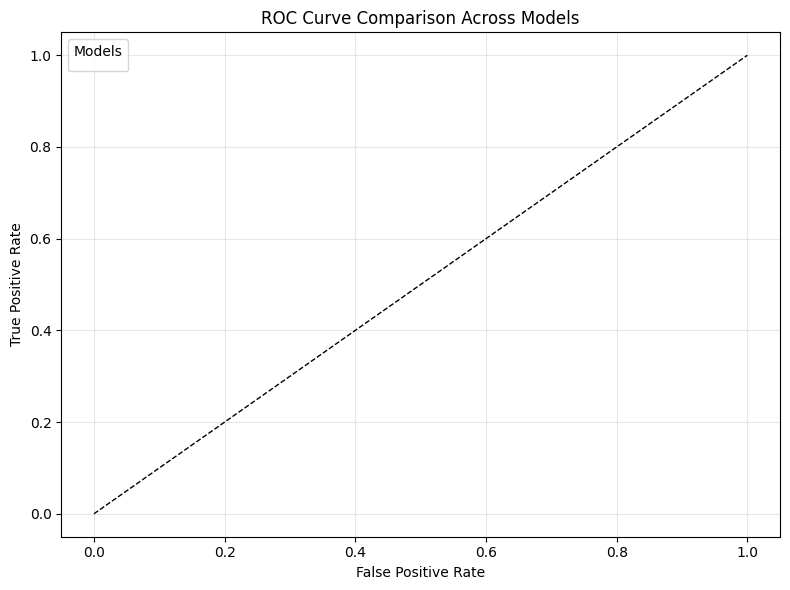

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in each model's ROC data 
svm = pd.read_csv("path/to/roc_svm.csv")
logistic = pd.read_csv("path/to/roc_rf.csv")
glmm = pd.read_csv("path/to/roc_xgb.csv")


# Plot all ROC curves
plt.figure(figsize=(8,6))

plt.plot(svm["FPR"], svm["TPR"], label="SVM")
plt.plot(logistic["FPR"], logistic["TPR"], label="Regularized Logistic Regression")
plt.plot(glmm["FPR"], glmm["TPR"], label="GLMM")

# Diagonal random-guess line
plt.plot([0, 1], [0, 1], "k--", lw=1)

# Labels, title, legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves Across Models")
plt.legend(title="Models")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
